# The GHZ-Game


### ACIT4321 Quantum Information Technology Fall 2022: Individual Project
 

In [1]:
#import required libraries and prerequisites
from ipywidgets import interact
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector, plot_state_qsphere
from GHZGame.ghzGame import *

In [2]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(3) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(3) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend, here a Quantum simulator

# Let's start the game!

We form two teams: Team ABC of three players Alice and Bob and Charlie and Team Quantum. Initially team ABC play the game classically and we will what will happen. However at the same time team Quantim will use the quantum strategy to win each time.



## The rules for this game are as follows:

Let us consider the three players Alice, Bob, and Charlie of Team ABC, and each of them gets an input value $x,\;y,$ and $z$  with single bits $x\in \{0,1\}$, $y\in \{0,1\}$, and $z\in \{0,1\}$ respectively. Conveniently, say the referee of the game, give each of the players a slip of papers with values 0 and 1. They have to produce an output $a,\; b,$ and $ c$ with single bits and for convenient it is written as $x\in \{\pm1\}$, $x\in \{\pm1\}$, and $x\in \{\pm1\}$ respectively. It means that the players have to shout out to the referee either the value $+1$ or $-1$. Also, the referee explains to the players that either two of them have received 1's on their slip of paper or none of them have received 1's. The winning conditions for Alice, Bob, and Charlie is shown in Table below with what they have to shout out must be $\{+1, -1, -1, -1\}$ for the corresponding combinations $\{000,110,011,101\}$. 

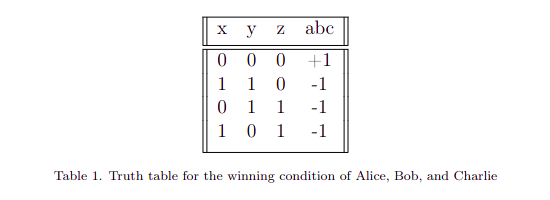

Which of the four sets of questions is used, is chosen randomly.

- Once the questions are asked, the team members are not allowed to communicate anymore. Before that, the team members are allowed to agree on a strategy.

## Alice, Bob and Charlie can Make choices:
(The 0 or 1 inside the brakets of the drop down fields below show the corresponding bit value. 

In [3]:
print ('Three players can now discuss which values each of you will say when asked either for the x or the y of your object.')
print ('')

print ('Alice:')
interact(Alice, Alices_x={'x (1)':1,'x (0)':-1}, Alices_y={'y (1)':1,'y (0)':-1})

print ('Bob:')
interact(Bob, Bobs_x={'x (1)':1,'x (0)':-1}, Bobs_y={'y (1)':1,'y (0)':-1})

print ('Charlie:')
interact(Charlie, Charlies_x={'x (1)':1,'x (0)':-1}, Charlies_y={'y (1)':1,'y (0)':-1})
print ('')

Three players can now discuss which values each of you will say when asked either for the x or the y of your object.

Alice:


interactive(children=(Dropdown(description='Alices_x', options={'x (1)': 1, 'x (0)': -1}, value=1), Dropdown(d…

Bob:


interactive(children=(Dropdown(description='Bobs_x', options={'x (1)': 1, 'x (0)': -1}, value=1), Dropdown(des…

Charlie:


interactive(children=(Dropdown(description='Charlies_x', options={'x (1)': 1, 'x (0)': -1}, value=1), Dropdown…

If the three players are confident with their choices try it out here. Do they have a 100% winning strategie that gives the correct answer for each of the four sets of questions? ("If any of them loose once, they will have to stay in prison forever".)

In [4]:
# runs the experiment for both teams, asking all four questions.
runExperiment()

Round  1 , Question  1
Team ABC is wrong, Team Quantum was right
Round  2 , Question  2
Both teams are right
Round  3 , Question  3
Both teams are right
Round  4 , Question  4
Both teams are right


## Why has the other team a 100% winning strategie while your team does not?

To find out what they do differently team ABC need to talk to team Quantum.

Bob from Team ABC: 
"*How did you do that? Isn't it impossible to constantly win this game? I mean look at this, we tried to solve it mathematically and the problem is unsolvable, you must have cheated!*"

(For easier calculations we replaced 0 for X and y with -1)

Team Quantum: 
"*Yes, you are right, but we did not cheat! We used so-called qubits and entanglement and with that it is possible to always win.*"

Bob from team ABC: 
"*What exactly is that and how does it work?*"
    
Team Quantum: 
"*Each of us had a qubit. You can imagine them as a little sphere with a vector pointing in 
    one direction. This vector describes the state the qubit is currently in.*"

/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


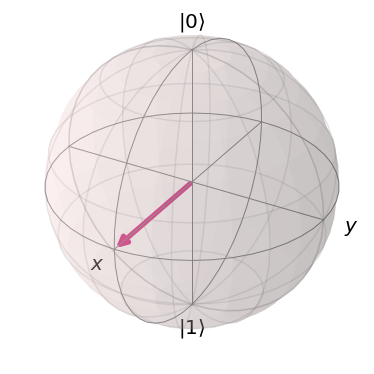

In [5]:
plot_bloch_vector([1,0,0])


So we used qubits that were entangled with each other and different "observables" of a quantum object. Normally, a Quantum Computer measures the Z-basis of a qubit but we measured X when asked for X and when asked for Y we measured Y-basis. The result for the Y measurement in the example above would always be 1, instead of the 50% probability of 0 or 1 when measuring the Z-value. 
    This will be explain later why exactly this works but as all three of our qubits were entangled, we got the correct answer for all cases.

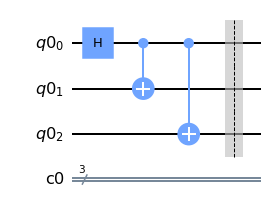

In [6]:
#GHZ quantum circuits
qc = QuantumCircuit(q, c)
# create GHZ state
qc.h(q[0]) #apply H-gate to the first qubit
qc.cx(q[0],q[1]) #entangle the first two qubits
qc.cx(q[0],q[2]) #entangle the first and the last qubit
qc.barrier() #visual seperation (optional)
qc.draw(output='mpl')

The first gate we see in the above circuit is the H-gate which brings the qubit into a superposition. The measurement output in this case has a 50\% probability of being $0$ and 50\% probability of being $1$. The rest of two other gates are the CNOT gates that operate on 2 qubits. The qubit with the dot is the control bit and the other one with the cross sign is the target bit.

*On a Quantum Computer you can only measure what 
            points in the direction of the Z-axis. Therefore, we need to make the state vector point in the  direction to derive information about the X or Y basis. When you are asked for the color (corresponds to x value) of your qubit you need to apply an 
            H-gate and measure the state afterwards. Applying the H-gate turns your state vector 180° around the 
            Z-axis and 90° around the Y-axis and therefore, enables you to read out the X-value.* 
            
*When asked for
            the shape you apply the sdg-gate followed by an H-gate and measure afterwards. This corresponds to 
            a Y measurement (shape) as the sdg gate turns the object by 270° around the Z-axis so that the 
            shape of the object is now pointing towards X. When applying an H-gate afterwards, it turns the 
            object 180° around the Z-axis and 90° around the Y-axis so that it is now pointing towards Z which is the only axis we are able to measure.*
            
*one can try to reconstruct the movements of a single qubit using the visualization below. Whether 
            the top or bottom side of the dice is revealed in a measurement is randomly chosen. In the initial 
            GHZ-state the dice is pointing up with a black side so that a color is pointing towards X and a
            shape towards Y.*
            
*The results for each player seems to be perfectly random, but all three results in fact are 
            strongly correlated and not independent. This is caused by the entanglement. The Bloch Sphere
            visualization can only be used for a single qubit, but not for the entire (entangled) system 
            of multiple qubits. However the so-called QSphere shows that the measurement results of the GHZ-State can only be |000> or |111> with equal probability:*

/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


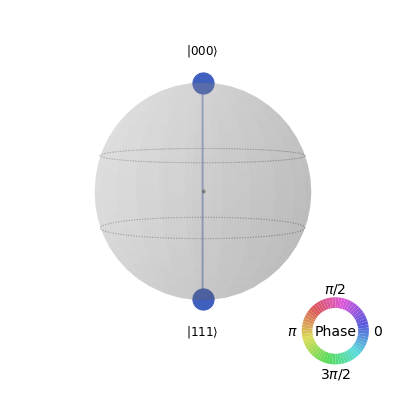

In [7]:
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(qc, backend).result()
psi = Statevector.from_instruction(qc)
plot_state_qsphere(psi)

To measure the Y-basis of a quantum state, the following quantum circuit can be used:


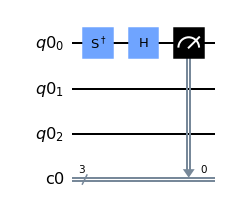

In [8]:
print ("To measure the Y-basis of a quantum state, the following quantum circuit can be used:")
qc = QuantumCircuit(q, c) #create a new Quantum circuit
# If measuring the X or Z-value, this step is not necessary:
#apply sdg-gate to qubit 0. Vector moves 90° counterclockwise around the Z-axis (e.g. from y-basis to x-basis)
qc.sdg(q[0]) 
# If measuring the Z-value, this step is not necessary:
#apply H-gate to qubit 0. Vector moves 180° around the Z-axis and 90° around the Y-axis (e.g. from x-basis to z-basis)
qc.h(q[0]) 
#create measurement gate for qubit 0
qc.measure(q[0],c[0]) 
#draw the circuit
qc.draw(output='mpl') 

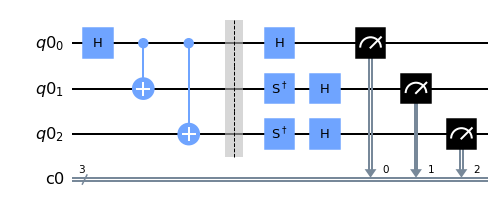

In [9]:
qc = QuantumCircuit(q, c) #create a new Quantum circuit
# create GHZ state
qc.h(q[0]) #apply H-gate to the first qubit
qc.cx(q[0],q[1]) #entangle the first two qubits
qc.cx(q[0],q[2]) #entangle the first and the last qubit
qc.barrier() #visual seperation (optional)

# measure each qubit accordingly
qc.h(q[0]) #apply H-gate to the first qubit (for x-value, player 1)
qc.sdg(q[1]) #apply sdg-gate to the second qubit
qc.h(q[1]) #apply H-gate to the second qubit (for y-value, player 2)
qc.sdg (q[2]) #apply sdg-gate to the third qubit
qc.h(q[2]) #apply H-gate to the third qubit (for y-value, player 3)
qc.measure(q,c) #create measurement gates for all qubits
qc.draw(output='mpl') #draw the circuit

    In this case the measurement results are distributed as follows:

/home/shailendra/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


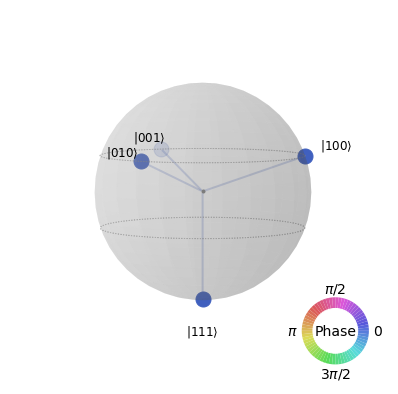

In [10]:
qc = QuantumCircuit(q, c) #create a new Quantum circuit
# create GHZ state
qc.h(q[0]) #apply H-gate to the first qubit
qc.cx(q[0],q[1]) #entangle the first two qubits
qc.cx(q[0],q[2]) #entangle the first and the last qubit
qc.barrier() #visual seperation (optional)

# measure each qubit accordingly
qc.h(q[0]) #apply H-gate to the first qubit (for x-value, player 1)
qc.sdg(q[1]) #apply sdg-gate to the second qubit
qc.h(q[1]) #apply H-gate to the second qubit (for y-value, player 2)
qc.sdg (q[2]) #apply sdg-gate to the third qubit
qc.h(q[2]) #apply H-gate to the third qubit (for y-value, player 3)
qc.draw(output='mpl') #draw the circuit
result = execute(qc, backend).result()
psi = Statevector.from_instruction(qc)
plot_state_qsphere(psi)

# So now let's play again, using this new strategy

To generate a random question execute the next cell:

In [11]:
question = randomQuestion()

The question to Team ABC is getting asked is:
x, x, x


Try to build a quantum circuit that can be used to answer these questions.

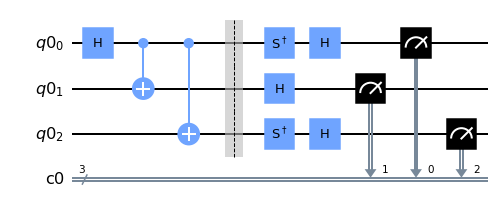

In [12]:
qc = QuantumCircuit(q, c) #creates a new Quantum circuit
#'''
#creates GHZ-state
qc.h(q[0]) #apply H-gate to the first qubit
qc.cx(q[0],q[1]) #entangle the first two qubits
qc.cx(q[0],q[2]) #entangle the first and the last qubit
qc.barrier() #visual seperation (optional)

#'''

qc.sdg(q[0])
qc.h(q[0])
qc.h(q[1])
qc.sdg(q[2])
qc.h(q[2])

#Hint: only h-gate for x-value, both gates for y-value


qc.measure(q,c) #create measurement gates for all qubits
qc.draw(output='mpl') #draw the circuit

## Now let's test your Quantum circuit:

In [13]:
# runs your quantum circuit 10000 times on a simulator and the maximum
#shots provided by the backend we used (qasm_simulator) is 10000.
simulate(qc, q, c, 10000)

{'111': 2570, '001': 2417, '010': 2510, '100': 2503}

Now you can check your results for yourself. You get several different answers and this can be correct as the requirements of an even or uneven number of ones or zeros can be satisfied in multiple ways.

### Do you think your answers were right? Check it here:

In [14]:
# compares whether the measurement results from your circuit correspond to the question asked
circuitCheck(qc, q, c, question)

Perfect! Team ABC won!


In [15]:
# prints out the correct code for your questions
correctAnswer(question)

Copy the following code in the cell above:


qc.h(q[0])
qc.h(q[1])
qc.h(q[2])


It works, and with this Quantum strategy the team ABC can always win, no matter which question is asked. But still I don't really understand why and how?

## Background Information

Entangled qubits have a strong dependency. Therefore, their states cannot be described individually but only in a correlated manner.
In the GHZ state, for example, when performing an XXX-measurement only the results $\;\; |000\rangle, |011\rangle,  |101\rangle $ and $ \;\;|110\rangle $ occur.
The fascinating thing is each qubit when observed individually (for example when only looking at the first qubit), behaves perfectly random. But when considering the whole system a dependency becomes obvious. 

A commonly known entangled state is the Bell state.The state can be $\;\frac{|00\rangle + |11\rangle}{\sqrt{2}}\;\;$. When measuring the first qubit in state 1 we can already say with certainty that the result of the second measurement will also be 1, as a state with mixed results cannot occur.

But let's go back to our Experiment. We remember the GHZ-state from above:

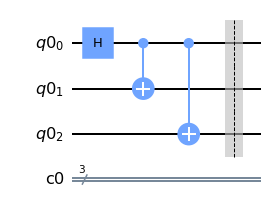

In [16]:
qc = QuantumCircuit(q,c)
ghz_state(qc,q).draw(output='mpl')

Which outcomes do you expect when executing this circuit, using the z-axis as measurement basis?

In [ ]:
quiz()

(a) All 8 possible states equally mixed (|000>, |001>, |010>, ..., |110>, |111>)
(b) A random distribution across all 8 states (|000>, |001>, |010>, ..., |110>, |111>)
(c) Measurement result in 50% is state |000> and in 50% is state |100>
(d) Measurement result in 50% is state |000> and in 50% is state |111>


Now try it out:

In [ ]:
plot_histogram(simulate(qc, q, c, 100)) # Visualise the results

Interestingly the only results that you get are either $ \;\;|000\rangle $ or $ \;\;|111\rangle $ with roughly 50/50 probability (Increase the number of shots to get more accurate results - closer to 50%).
This is because q0 is brought into a superposition. In case it is 0 the two CNOT gates do not change the value of the other two qubits. If it is 1 both of the other values (which initially were 0) are flipped to 1.

This becomes obvious when looking at the state which can be written as $\;\;|GHZ\rangle=\frac{|000\rangle + |111\rangle}{\sqrt{2}}\;\;$ and only consists of these two basis states.